# Workload聚合数据-多压力

In [1]:
import sys
sys.path.append('./tools')

from aggregation import *
import analyze
import display

In [2]:
exp_root = "/home/ict/appProfile/data/redis_1"
senario = "same_thread"
qos_columns = [
    "app_redis_qos_qps_of_redis_get",
    "app_redis_qos_qps_of_redis_total",
    "app_redis_qos_qps_of_redis_set",
    "app_redis_qos_p99_latency_set",
    "app_redis_qos_p99_latency_get",
]



corr_f = analyze.pearson_correlation
exp_roots = exp_roots_from_dir(exp_root, senario)

In [3]:
no_stress_exp_root = exp_roots["no_stress"]
exp_root = exp_roots["stresses"][0]

no_stress_exp_data = read_from_dir(no_stress_exp_root)
no_stress_exp_data.set_workload_preprocess_funcs([
    filter_column_startswith(col_prefix=("vm", "app")),
    filter_column_useless(),
    filter_row_noise(col_prefix=("app")),
])

no_stress_df_epoch = no_stress_exp_data.agg_epoch()
workload_keys = list(no_stress_df_epoch.index)
workload_keys

['redis_0',
 'redis_1',
 'redis_2',
 'redis_3',
 'redis_4',
 'redis_5',
 'redis_6',
 'redis_7',
 'redis_8']

In [4]:
# 选择workload
workload_key = workload_keys[8]
# 选择QoS指标
qos_column = qos_columns[3]

# 一、干扰敏感度分析

## 1. Workload对于不同干扰的箱线图

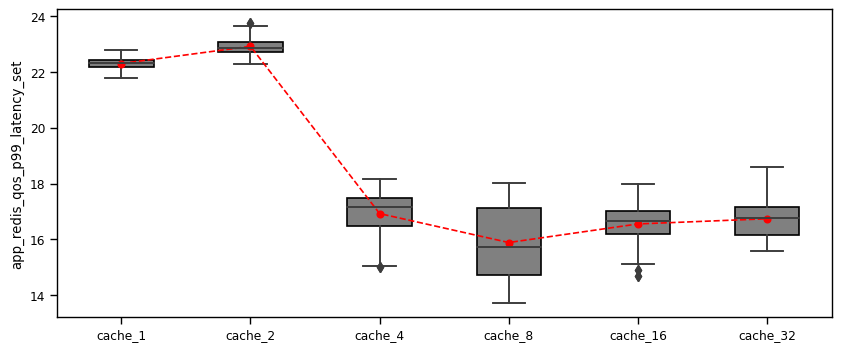

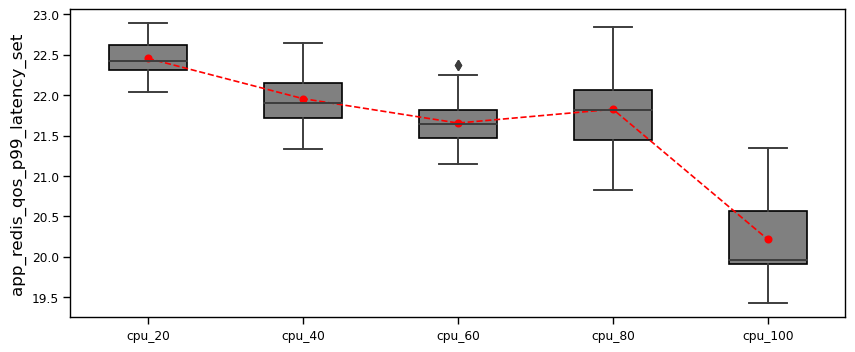

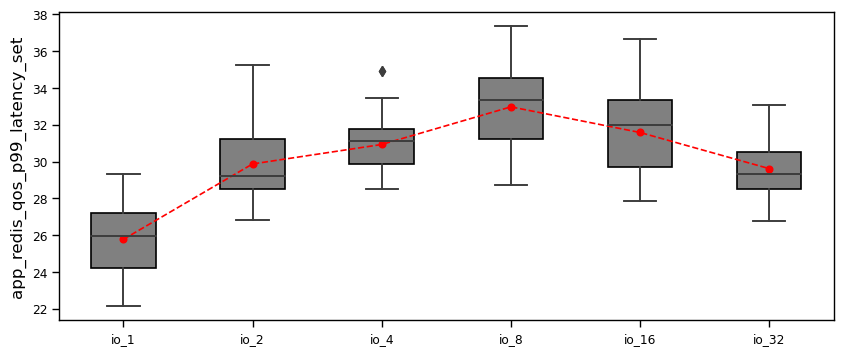

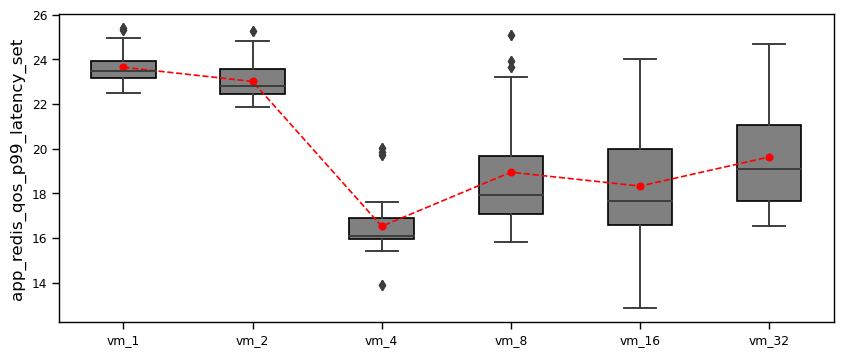

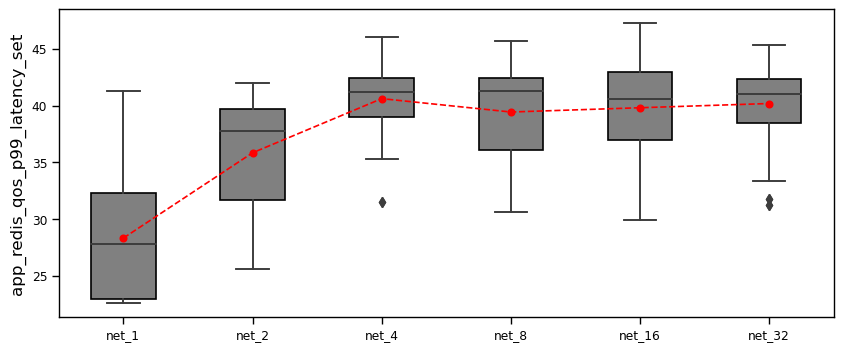

In [5]:
for exp_root in exp_roots["stresses"]:
    exp_data = read_from_dir(exp_root)
    exp_data.set_workload_preprocess_funcs([
        filter_column_startswith(col_prefix=("stress", "vm", "app")),
        filter_column_useless(excol_prefix=("stress")),
        filter_row_noise(col_prefix=("app")),
    ])


    df = exp_data.one_column_on_stresses(qos_column, workload_key)
    display.plt_box(df, "", qos_column)

## 2. 不同Workload下的劣化程度

In [6]:
dfs = []
for exp_root in exp_roots["stresses"]:
    exp_data = read_from_dir(exp_root)
    df = agg_per_workload_stress(exp_data, no_stress_df_epoch, qos_column, stress="stress_cpu-load")
    dfs.append(df)
det_df = pd.concat(dfs)
det_df

,redis_0,redis_1,redis_2,redis_3,redis_4,redis_5,redis_6,redis_7,redis_8
cache_1,1.845354e-01,-0.000954,-0.082611,0.018733,-0.002945,0.000540,0.074895,0.022932,0.002523
cache_2,1.829029e-04,-0.001311,0.009290,0.018292,-0.004241,0.000895,0.051480,0.025411,0.030232
cache_4,6.743736e-04,0.876115,0.145511,0.275711,0.206564,0.162984,0.025889,-0.113458,-0.239274
cache_8,1.041897e-04,0.977696,0.039972,0.274291,0.205651,0.170722,0.034488,-0.117918,-0.285880
cache_16,6.347021e-04,0.981719,0.039559,0.257219,0.207369,0.175777,0.016692,-0.111606,-0.255936
cache_32,7.816300e-04,0.985054,0.038975,0.261870,0.206019,0.183861,0.035471,-0.109687,-0.247574
cpu-load_20,8.181285e-05,0.000476,-0.038917,0.028046,0.071531,0.160271,0.086250,0.030478,0.009267
cpu-load_40,1.784476e-04,0.947084,0.027936,0.214520,0.192887,0.126293,0.040778,0.019379,-0.013147
cpu-load_60,8.202190e-04,0.969394,0.029681,0.253416,0.200567,0.158058,0.050236,0.008955,-0.026722
cpu-load_80,4.436697e-04,0.988906,0.277571,0.296584,0.363091,0.307599,0.093982,0.017891,-0.019055


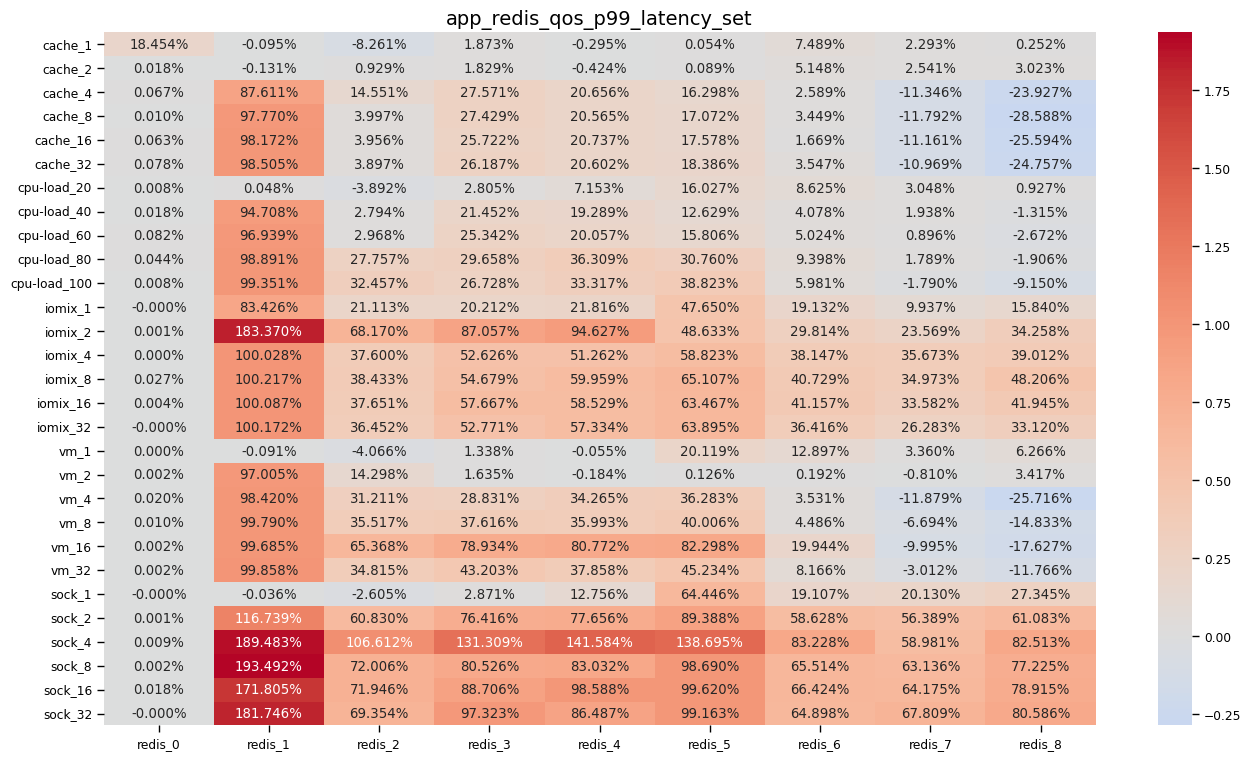

In [7]:
display.plt_deterioration_heatmap(det_df, qos_column)

## 3. 不同Workload的TopN交集

### (1) 无干扰

In [8]:
top_n = 10
